**CSCI 4502 Project: Foreign Direct Investment in Africa in the time period 2003-2016**
Team members: Tanay Choudhary, Nikolai Sei, Ankita Singh

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import string
import random

In [46]:
local_path = "Combined.csv"
file_name = local_path
mydata = pd.read_csv(file_name, encoding = "ISO-8859-1", error_bad_lines=False)

mydata.head()

,Year,Country,spcbsv,altbsv,aucbsv,aembsv,bevbsv,bcmbsv,bmebsv,bsvbsv,...,Time required to get electricity (days) [IC.ELC.TIME],Time spent dealing with the requirements of government regulations (% of senior management time) [IC.GOV.DURS.ZS],Time required to start a business (days) [IC.REG.DURS],Time to import (days) [IC.IMP.DURS],"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age) [SH.ALC.PCAP.LI]",Tuberculosis treatment success rate (% of new cases) [SH.TBS.CURE.ZS],"Tuberculosis case detection rate (%, all forms) [SH.TBS.DTEC.ZS]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Value lost due to electrical outages (% of sales) [IC.FRM.OUTG.ZS],Vitamin A supplementation coverage rate (% of children ages 6-59 months) [SN.ITK.VITA.ZS]
0,2003,Algeria,0,0,0,0,0,0,0,30,...,NaN,NaN,25.0,NaN,NaN,90.0,80.0,23.700001,NaN,NaN
1,2004,Algeria,0,0,0,0,0,0,0,0,...,NaN,NaN,24.0,NaN,NaN,91.0,80.0,17.700001,NaN,NaN
2,2005,Algeria,0,0,0,0,0,0,0,45,...,NaN,NaN,24.0,22.0,NaN,87.0,80.0,15.300000,NaN,NaN
3,2006,Algeria,0,0,0,0,0,0,0,60,...,NaN,NaN,24.0,22.0,NaN,91.0,80.0,12.300000,NaN,NaN
4,2007,Algeria,0,0,0,0,0,0,0,84,...,NaN,25.1,24.0,23.0,NaN,90.0,80.0,13.800000,4.0,NaN


In [47]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 666 entries, Year to Vitamin A supplementation coverage rate (% of children ages 6-59 months) [SN.ITK.VITA.ZS]
dtypes: float64(137), int64(528), object(1)
memory usage: 3.8+ MB


In [48]:
# We slice the data to the parts we need to
df = mydata.loc[-1:, "Year":"allall"]
dfcolumns = df.loc[-1:, "Country":"allall"]


df = df.fillna(0)

#This creates a new column total that adds up all the values for one single year for a particular country
#df["Total"] = df.loc[-1:,"spcbsv":"allall"].sum(axis = 1)
df = df.rename(columns={'allall': 'Total'})
df.head()


,Year,Country,spcbsv,altbsv,aucbsv,aembsv,bevbsv,bcmbsv,bmebsv,bsvbsv,...,pppall,phrall,plsall,relall,sitall,texall,trsall,wasall,lneall,Total
0,2003,Algeria,0,0,0,0,0,0,0,30,...,0,1128,0,0,16,0,0,0,0,3054
1,2004,Algeria,0,0,0,0,0,0,0,0,...,0,389,0,0,0,0,0,24,0,2857
2,2005,Algeria,0,0,0,0,0,0,0,45,...,76,376,0,1965,150,0,186,0,0,10351
3,2006,Algeria,0,0,0,0,0,0,0,60,...,0,0,180,18,162,172,196,0,0,8298
4,2007,Algeria,0,0,0,0,0,0,0,84,...,0,0,0,875,16,76,0,0,0,5518


In [49]:
X = df["Total"].sum()
print("The Total FDI in Africa over the 10 year range is {} Million USD ".format(X))

The Total FDI in Africa over the 10 year range is 1657388 Million USD 


In [50]:
#We create a list with all the unique countries in Africa

Country = df["Country"].unique()
np.asarray(Country)
total_country = np.count_nonzero(Country)
print("The total number of countries in Africa according to the WorldBank are:",total_country )
print()
print("The countries are:", Country)

The total number of countries in Africa according to the WorldBank are: 54

The countries are: ['Algeria' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Cape Verde' 'Central African Republic' 'Chad' 'Comoros' 'Congo (DRC)'
 "Cote d'Ivoire" 'Djibouti' 'Egypt' 'Equatorial Guinea' 'Eritrea'
 'Ethiopia' 'Gabon' 'Gambia' 'Ghana' 'Guinea' 'Guinea Bissau' 'Kenya'
 'Lesotho' 'Liberia' 'Libya' 'Madascar' 'Malawi' 'Mali' 'Mauritania'
 'Mauritius' 'Morocco' 'Mozambique' 'Namibia' 'Niger' 'Nigeria'
 'Republic of the Congo' 'Rwanda' 'Sao Tome and Principe' 'Senegal'
 'Seychelles' 'Sierra Leone' 'Somalia' 'South Africa' 'South Sudan' 'Sudan'
 'Swaziland' 'Tanzania' 'Togo' 'Tunisia' 'Uganda' 'Zambia' 'Zimbabwe']


All numeric values are in millions

The total investment in Algeria in year range 2003-2016 in is 96277 million 


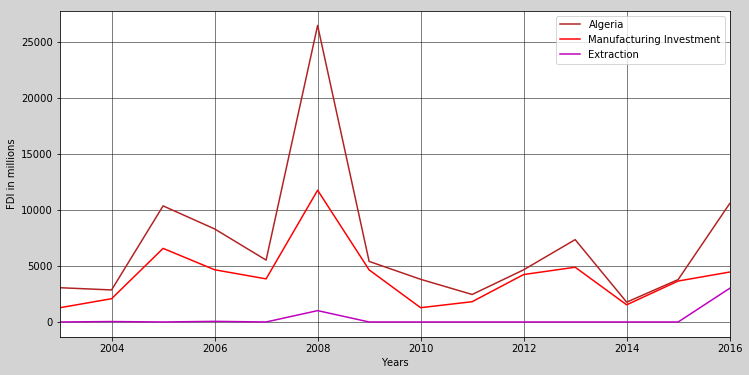

The total investment in Angola in year range 2003-2016 in is 38888 million 


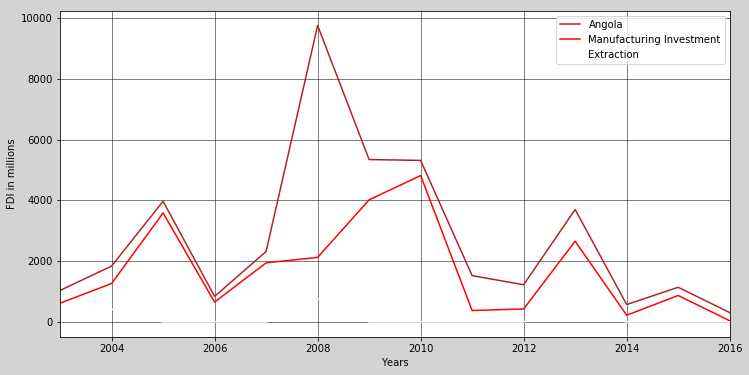

The total investment in Benin in year range 2003-2016 in is 1335 million 


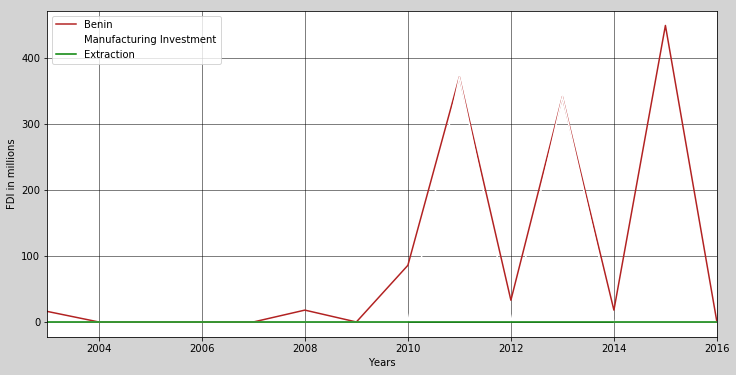

The total investment in Botswana in year range 2003-2016 in is 21581 million 


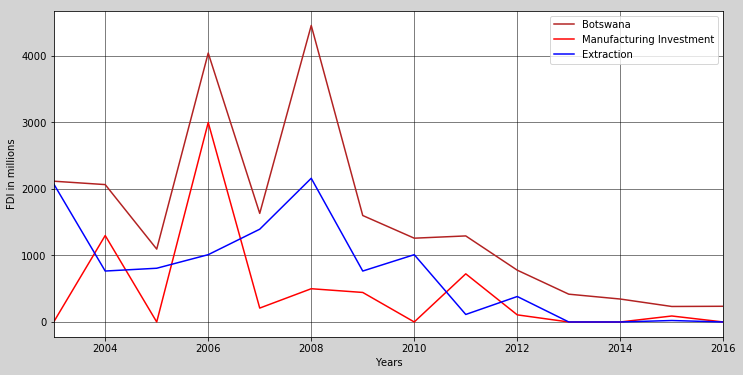

The total investment in Burkina Faso in year range 2003-2016 in is 9064 million 


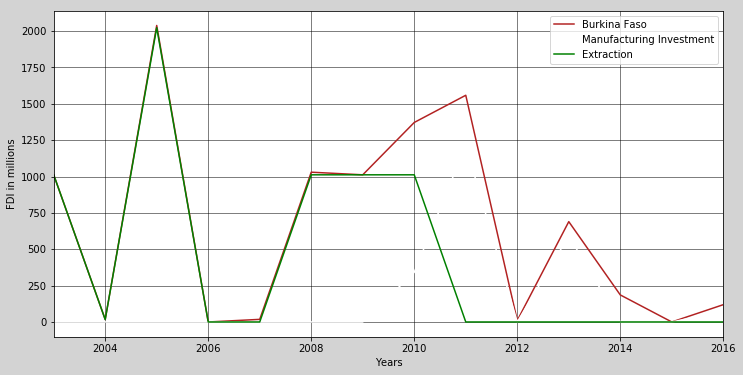

The total investment in Burundi in year range 2003-2016 in is 2622 million 


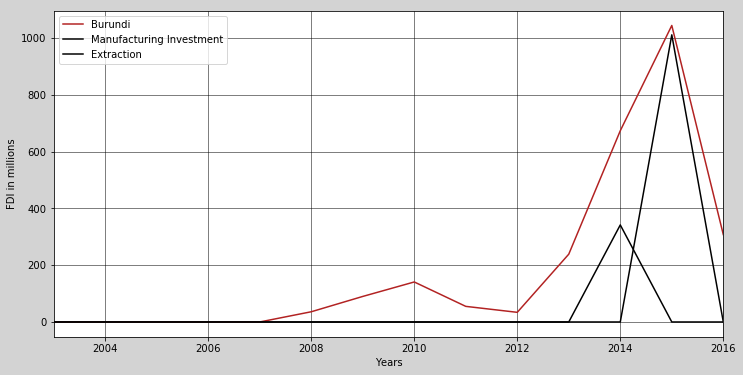

The total investment in Cameroon in year range 2003-2016 in is 25415 million 


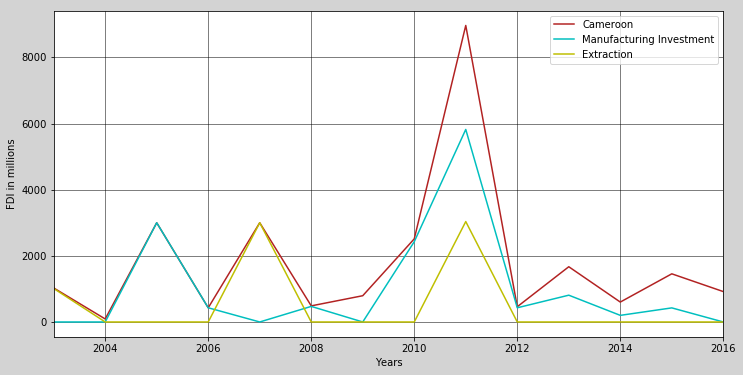

The total investment in Cape Verde in year range 2003-2016 in is 3245 million 


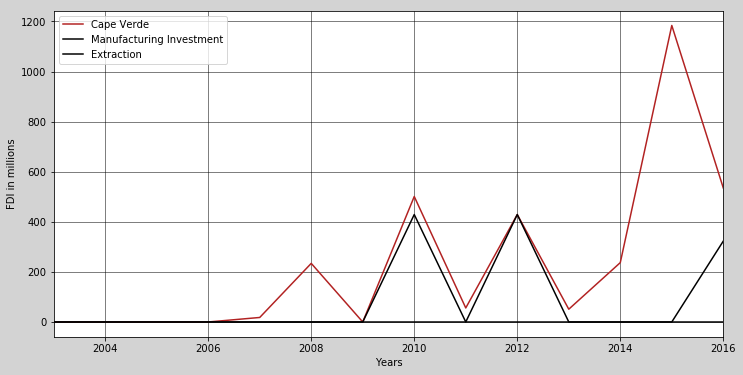

The total investment in Central African Republic in year range 2003-2016 in is 673 million 


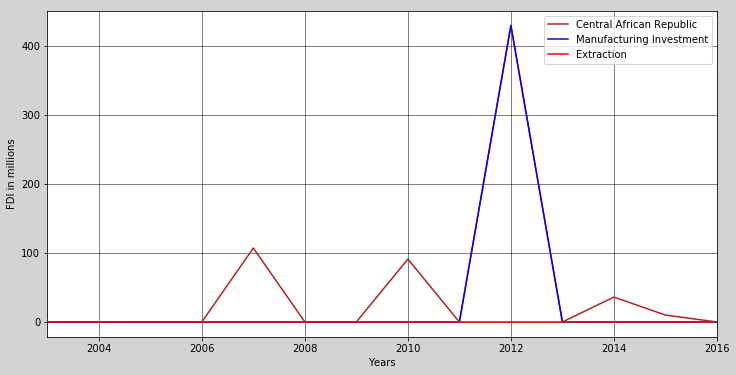

The total investment in Chad in year range 2003-2016 in is 5817 million 


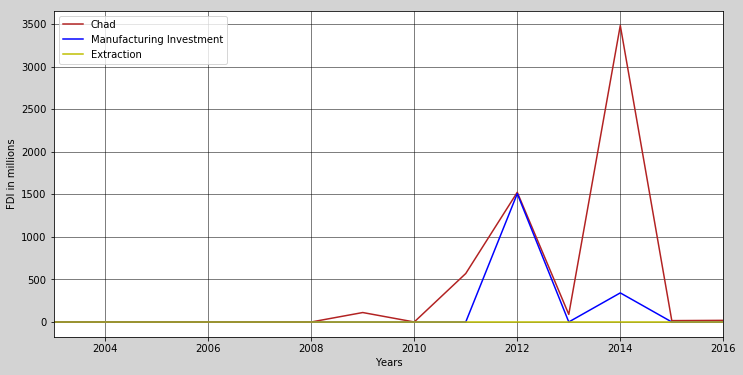

The total investment in Comoros in year range 2003-2016 in is 324 million 


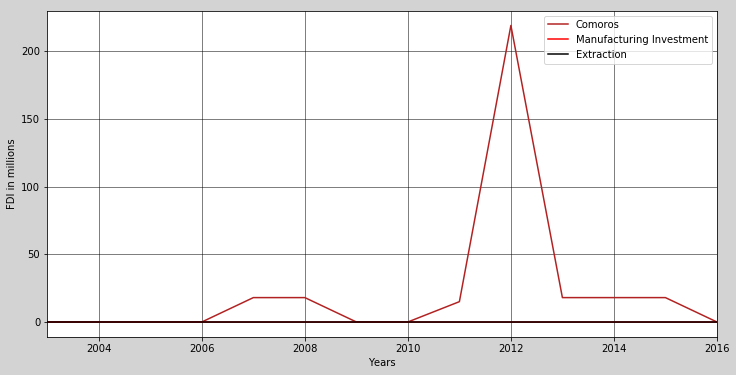

The total investment in Congo (DRC) in year range 2003-2016 in is 36343 million 


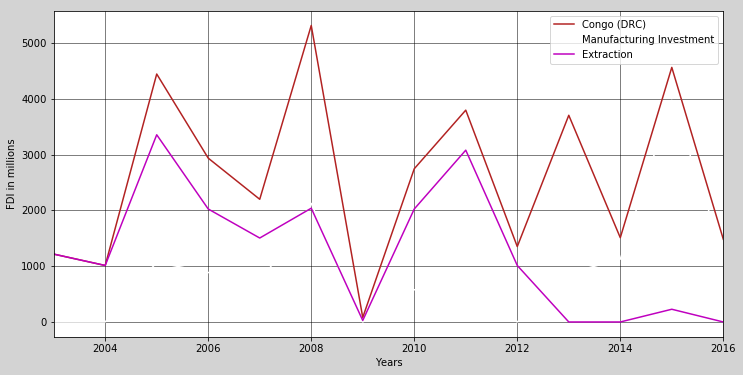

The total investment in Cote d'Ivoire in year range 2003-2016 in is 0 million 


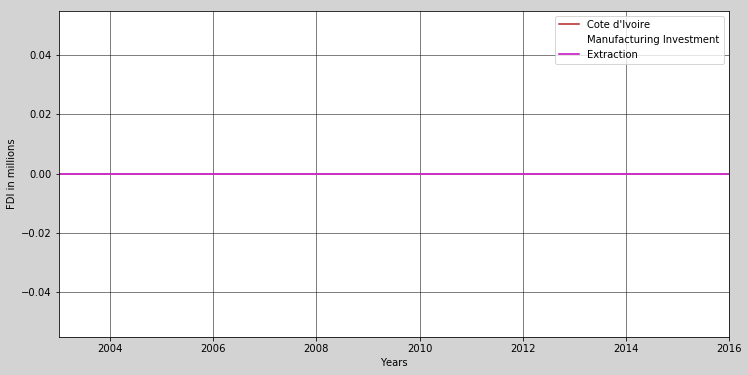

The total investment in Djibouti in year range 2003-2016 in is 5355 million 


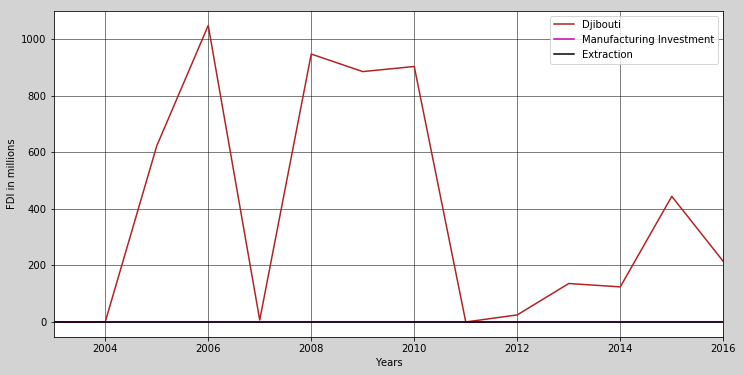

The total investment in Egypt in year range 2003-2016 in is 215644 million 


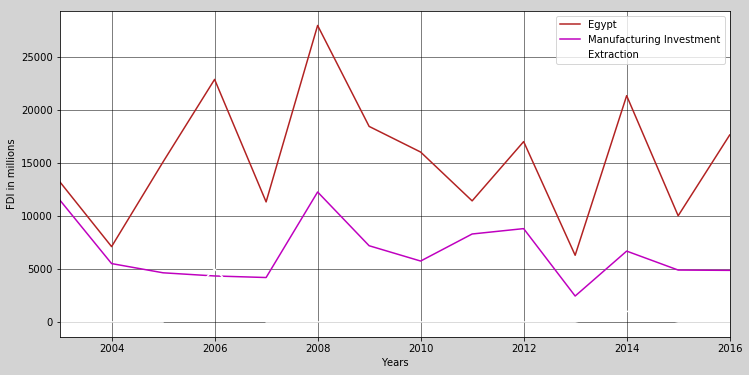

The total investment in Equatorial Guinea in year range 2003-2016 in is 695 million 


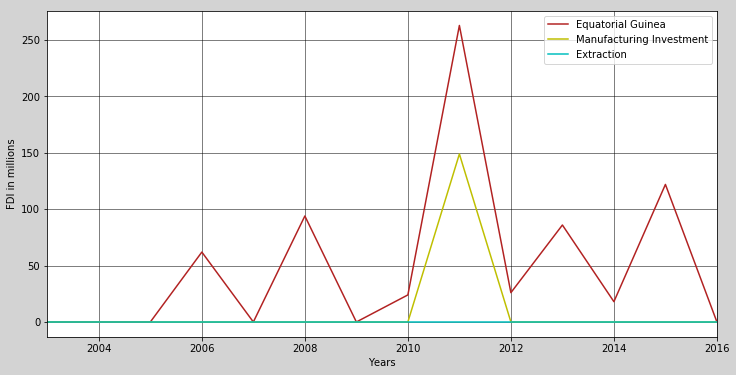

The total investment in Eritrea in year range 2003-2016 in is 5404 million 


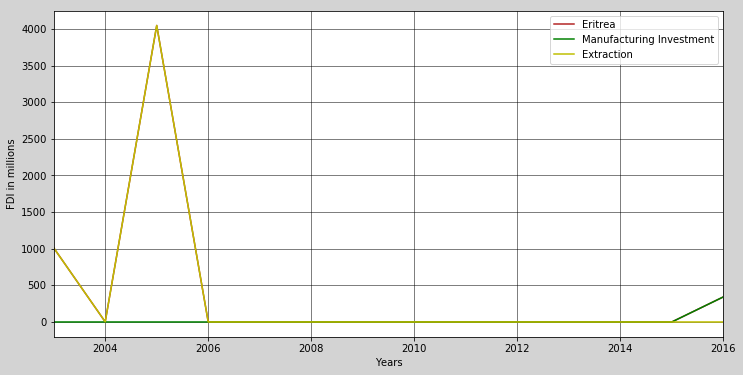

The total investment in Ethiopia in year range 2003-2016 in is 94369 million 


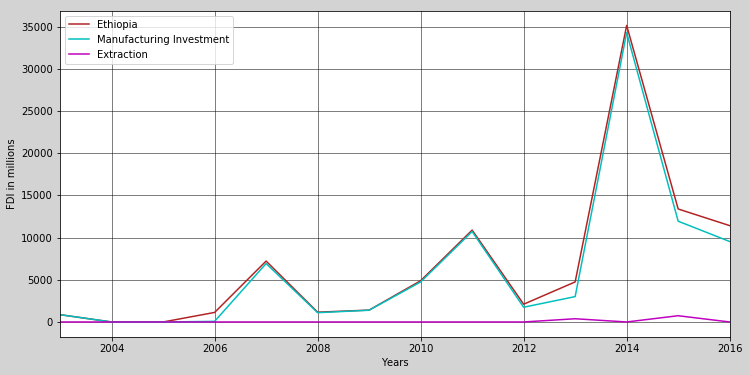

The total investment in Gabon in year range 2003-2016 in is 5416 million 


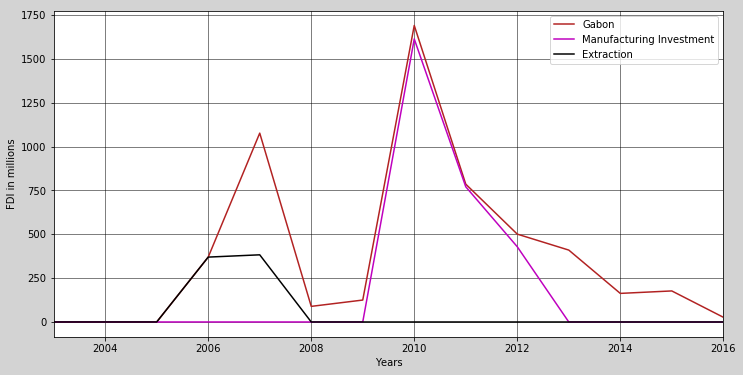

The total investment in Gambia in year range 2003-2016 in is 2517 million 


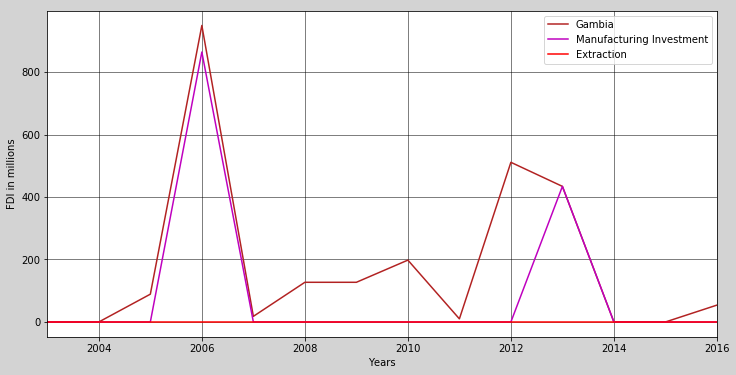

The total investment in Ghana in year range 2003-2016 in is 0 million 


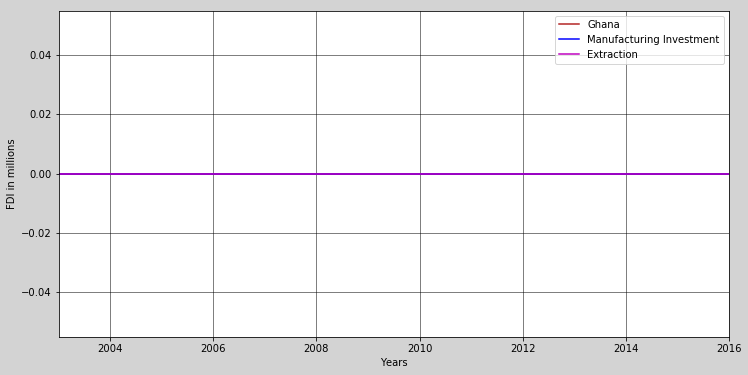

The total investment in Guinea in year range 2003-2016 in is 14163 million 


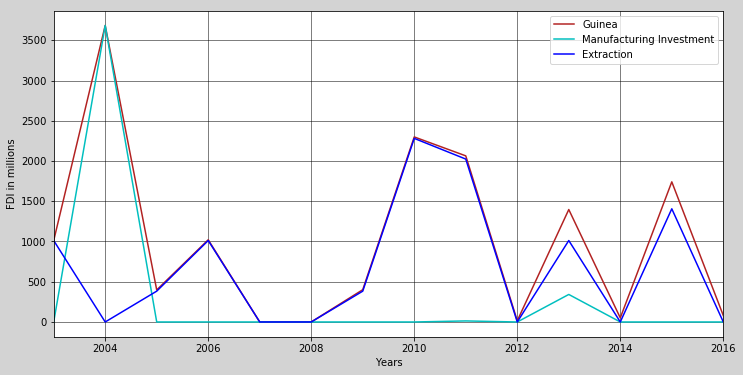

The total investment in Guinea Bissau in year range 2003-2016 in is 3927 million 


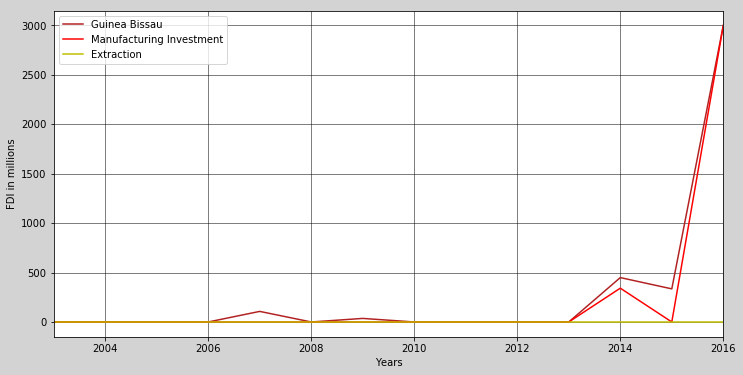

The total investment in Kenya in year range 2003-2016 in is 51982 million 


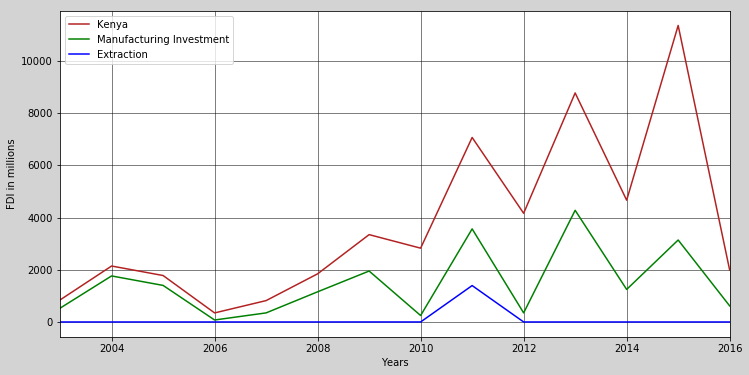

The total investment in Lesotho in year range 2003-2016 in is 4323 million 


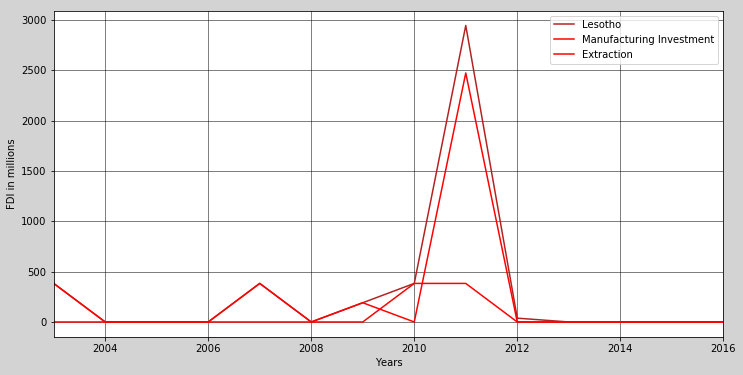

The total investment in Liberia in year range 2003-2016 in is 10771 million 


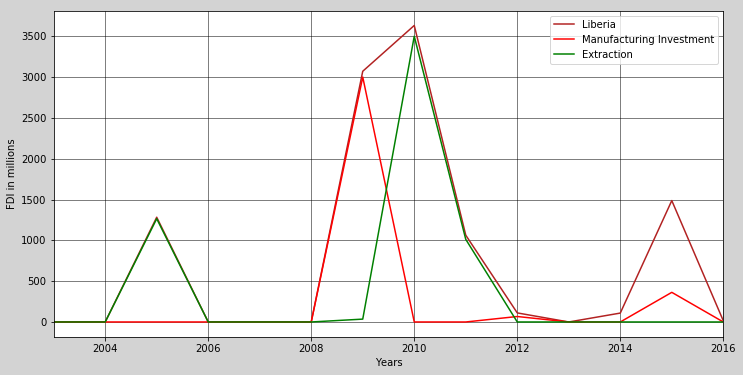

The total investment in Libya in year range 2003-2016 in is 26757 million 


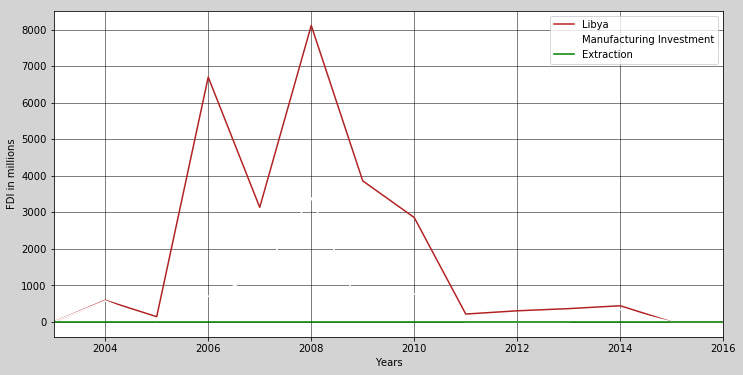

The total investment in Madascar in year range 2003-2016 in is 0 million 


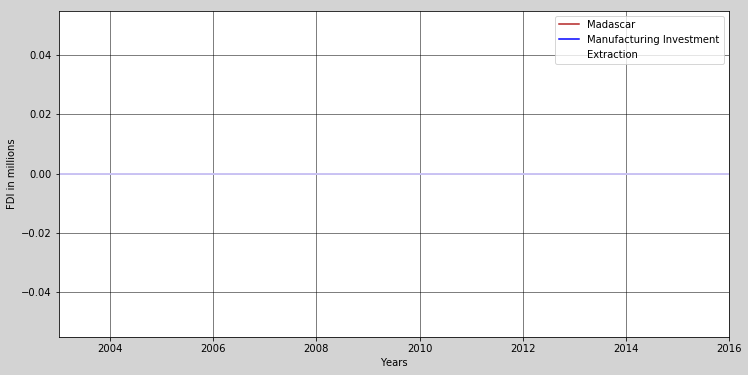

The total investment in Malawi in year range 2003-2016 in is 2915 million 


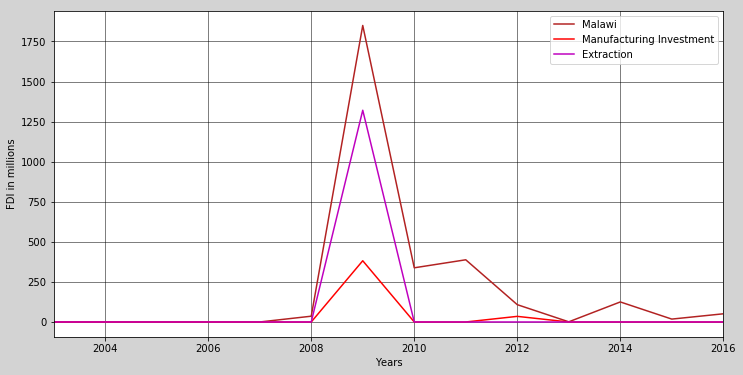

The total investment in Mali in year range 2003-2016 in is 8994 million 


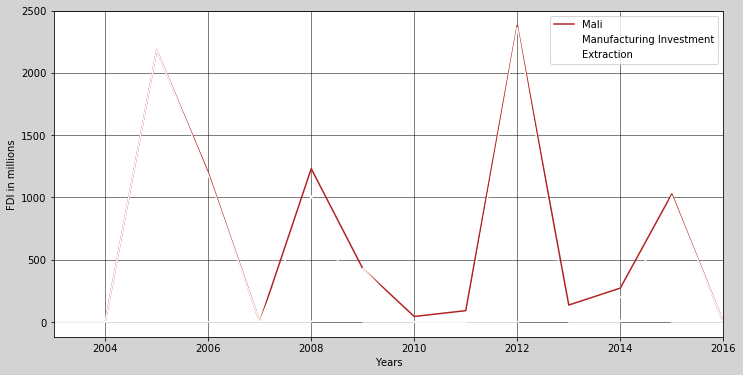

The total investment in Mauritania in year range 2003-2016 in is 6912 million 


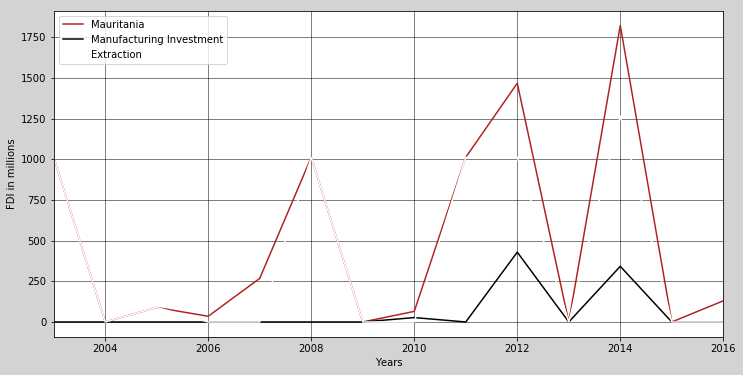

The total investment in Mauritius in year range 2003-2016 in is 8785 million 


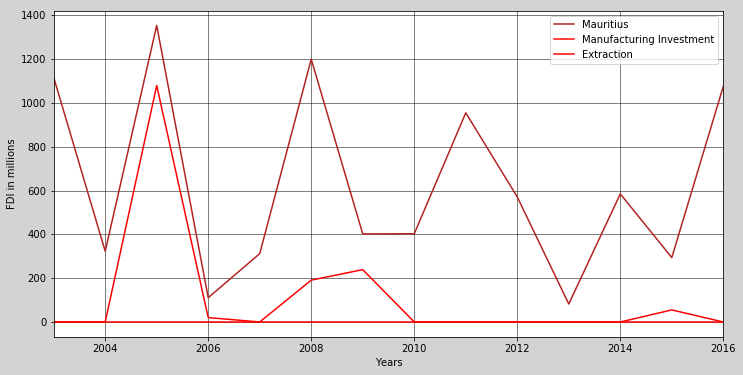

The total investment in Morocco in year range 2003-2016 in is 222976 million 


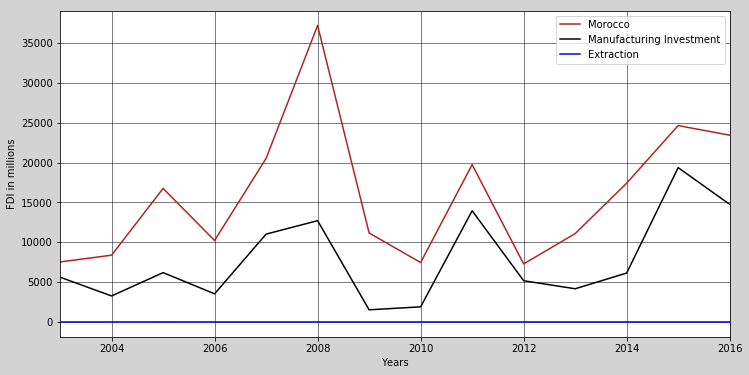

The total investment in Mozambique in year range 2003-2016 in is 54630 million 


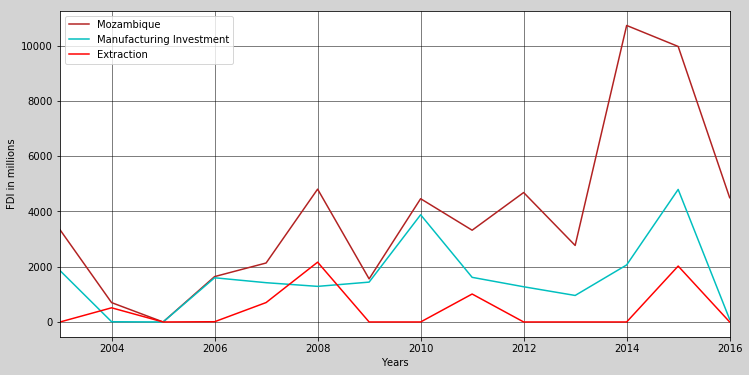

The total investment in Namibia in year range 2003-2016 in is 23463 million 


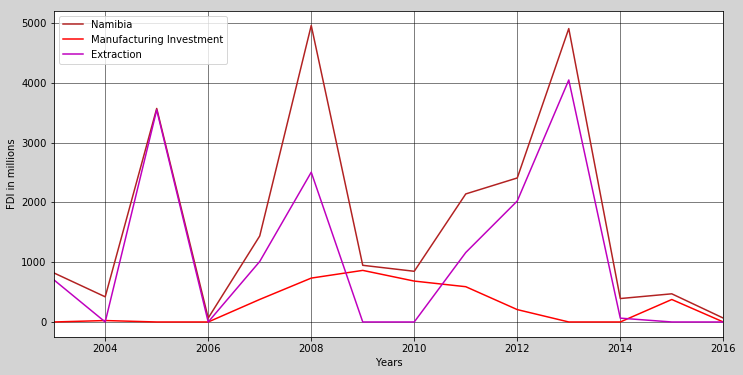

The total investment in Niger in year range 2003-2016 in is 3525 million 


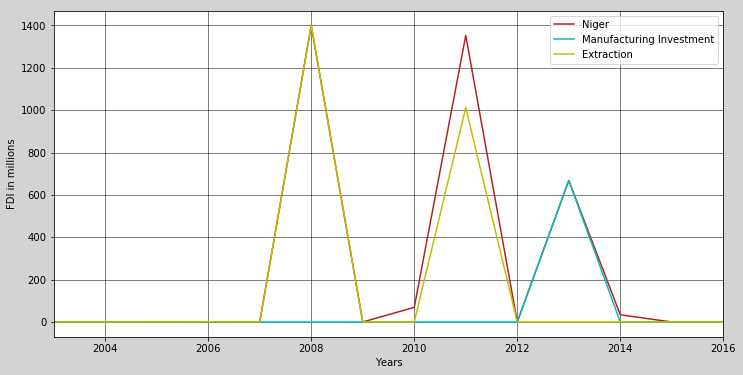

The total investment in Nigeria in year range 2003-2016 in is 109048 million 


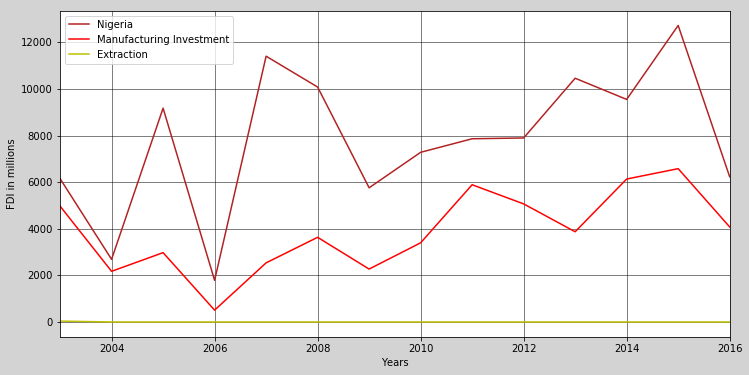

The total investment in Republic of the Congo in year range 2003-2016 in is 8116 million 


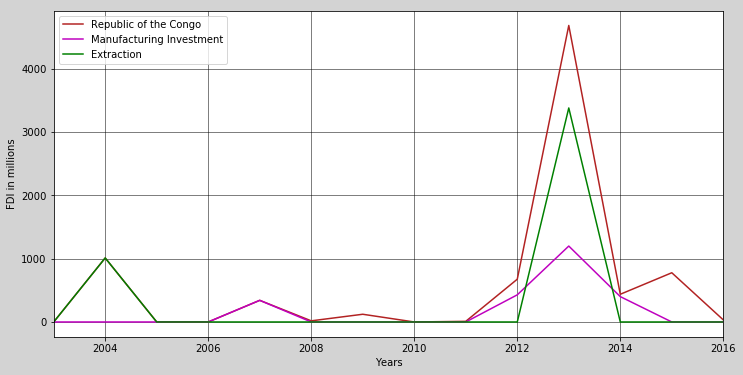

The total investment in Rwanda in year range 2003-2016 in is 10958 million 


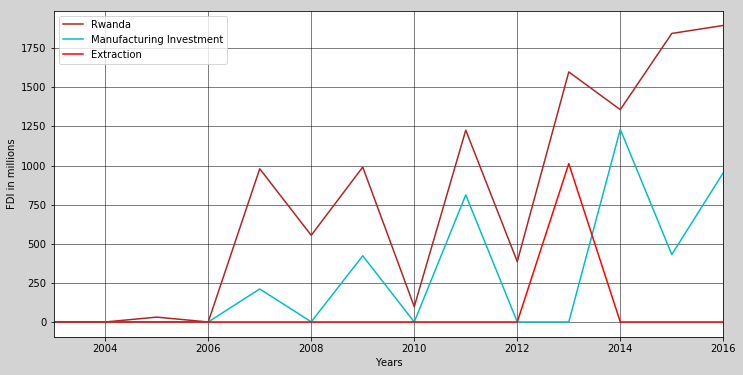

The total investment in Sao Tome and Principe in year range 2003-2016 in is 10958 million 


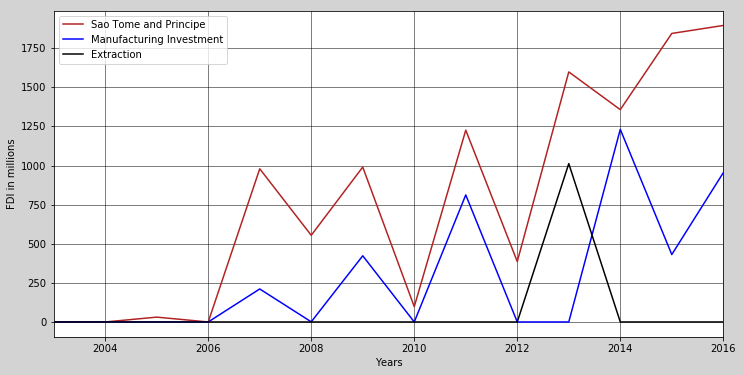

The total investment in Senegal in year range 2003-2016 in is 19838 million 


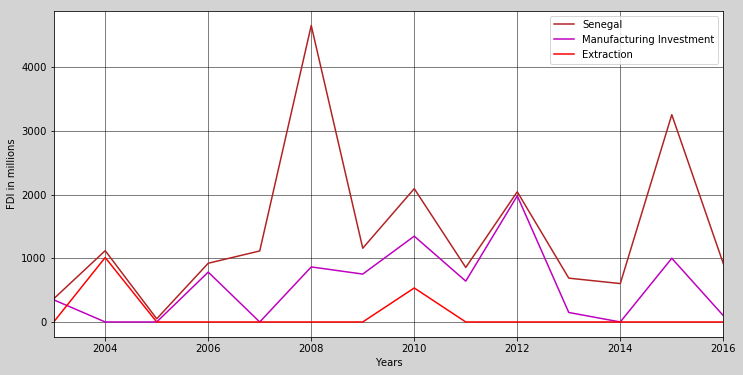

The total investment in Seychelles in year range 2003-2016 in is 1989 million 


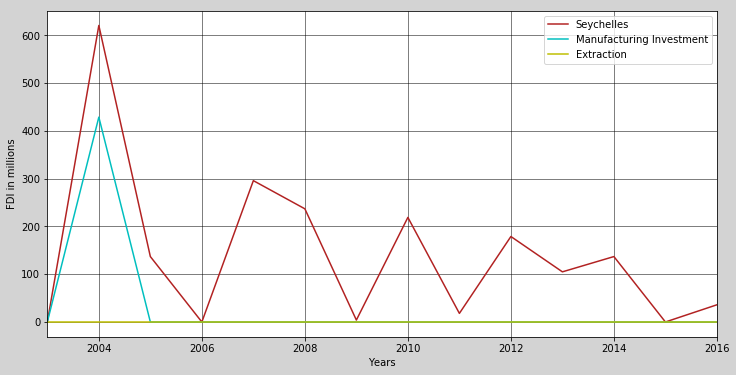

The total investment in Sierra Leone in year range 2003-2016 in is 13051 million 


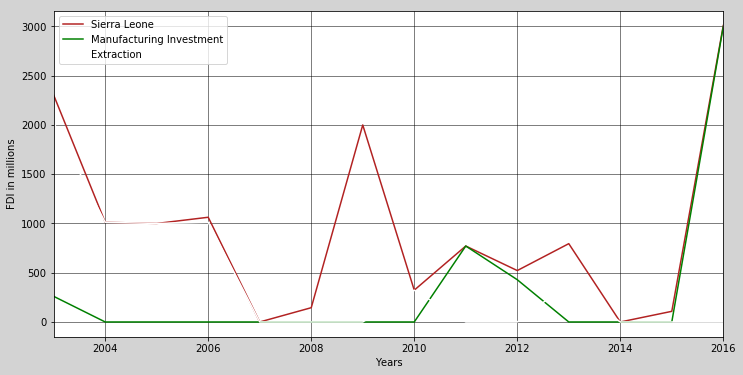

The total investment in Somalia in year range 2003-2016 in is 2151 million 


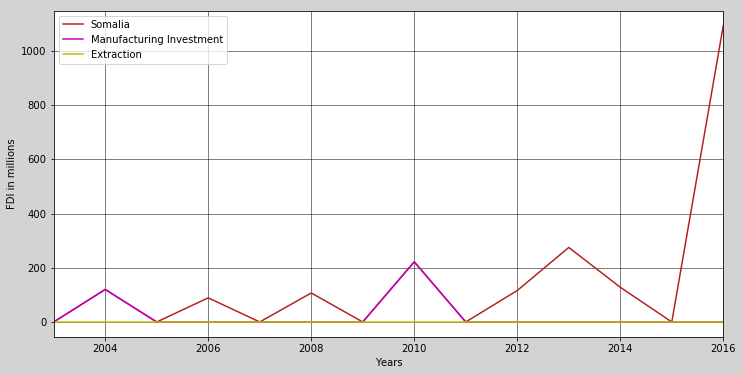

The total investment in South Africa in year range 2003-2016 in is 206239 million 


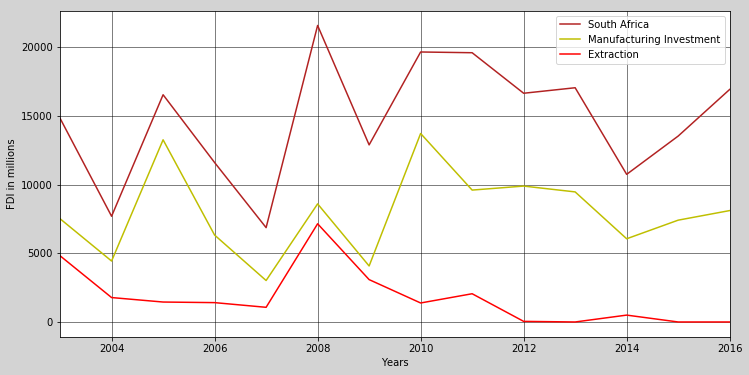

The total investment in South Sudan in year range 2003-2016 in is 4416 million 


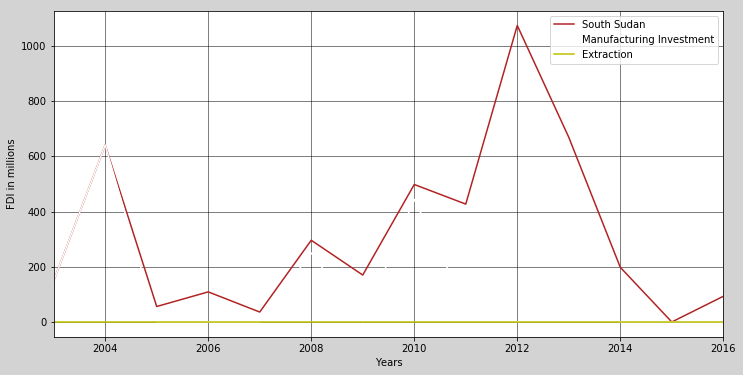

The total investment in Sudan in year range 2003-2016 in is 15636 million 


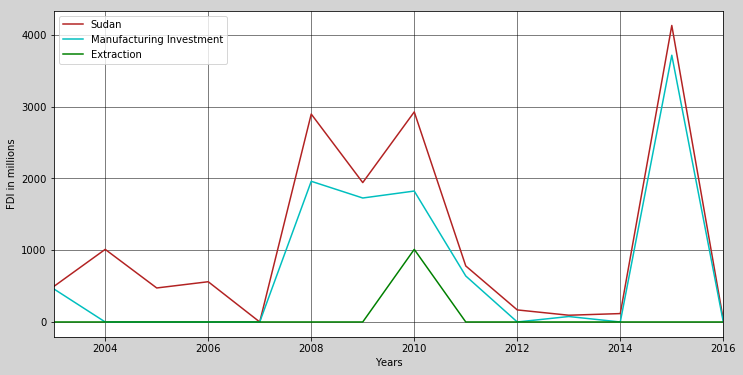

The total investment in Swaziland in year range 2003-2016 in is 8442 million 


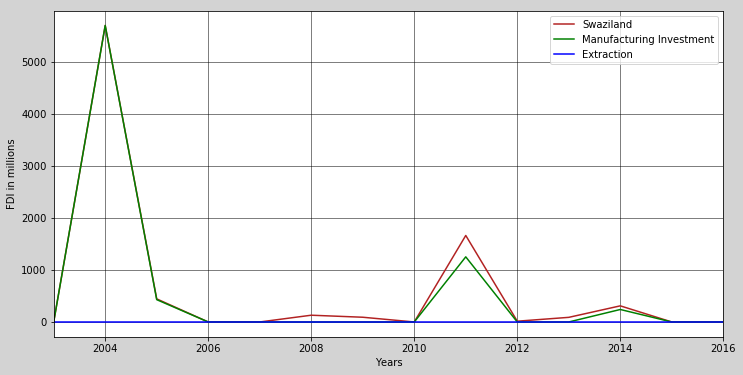

The total investment in Tanzania in year range 2003-2016 in is 34738 million 


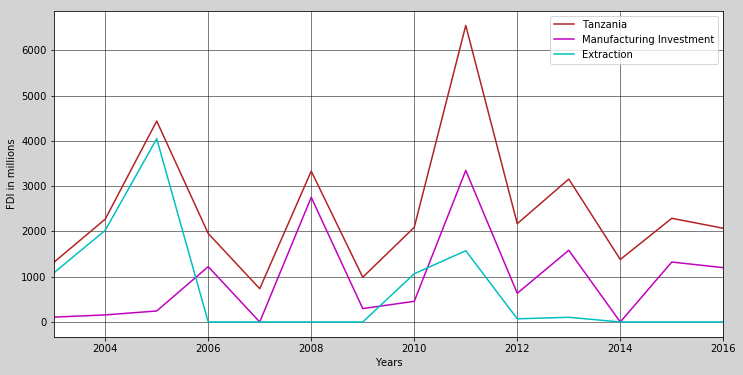

The total investment in Togo in year range 2003-2016 in is 2183 million 


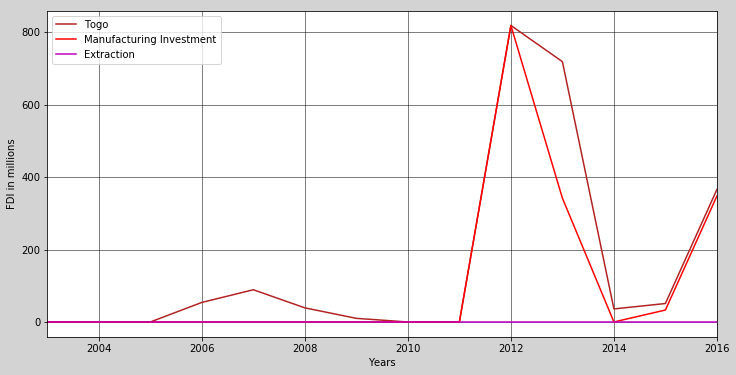

The total investment in Tunisia in year range 2003-2016 in is 89084 million 


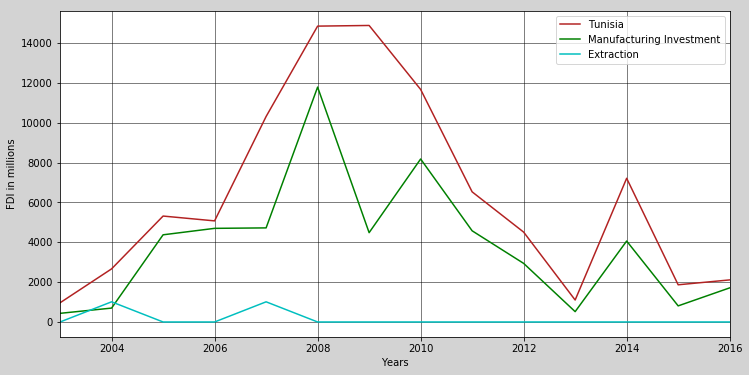

The total investment in Uganda in year range 2003-2016 in is 21987 million 


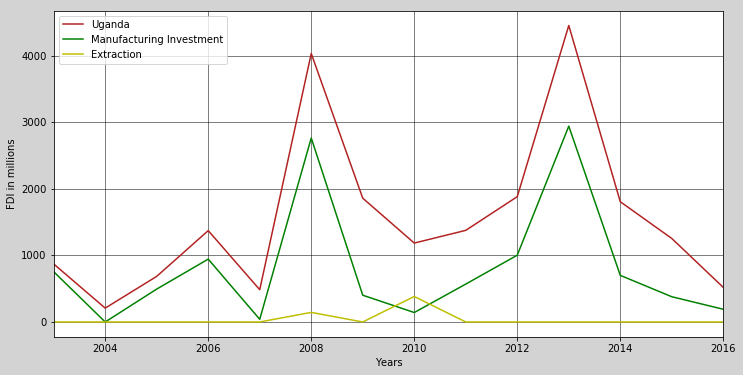

The total investment in Zambia in year range 2003-2016 in is 57501 million 


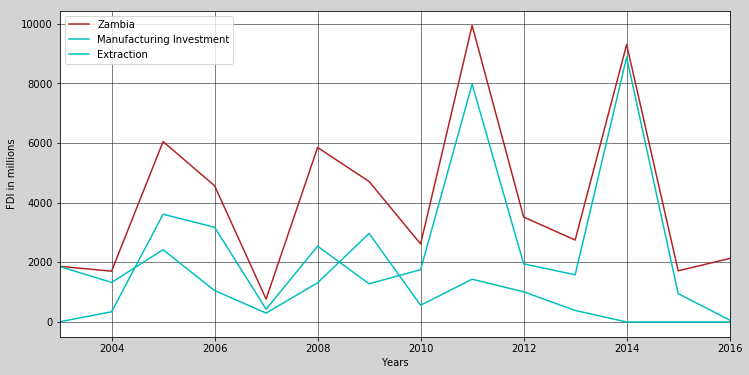

The total investment in Zimbabwe in year range 2003-2016 in is 25946 million 


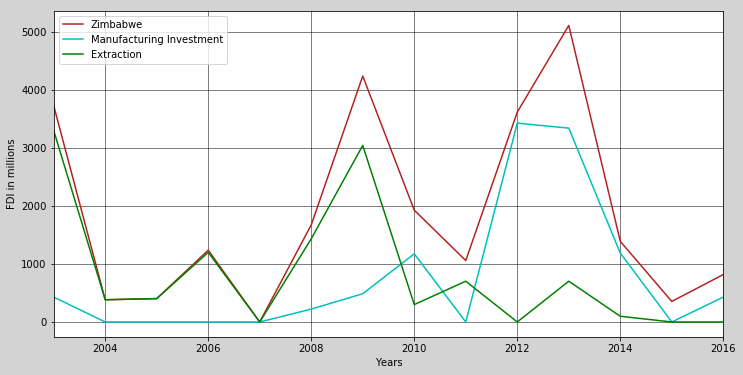

In [51]:
#The total investment statistics for every country, but this is very time consuming.

print("All numeric values are in millions")
print()

#CREATE A NEW DATAFRAME CALLED TOTAL THAT WILL STORE THE VALUES OF A 10 YEAR RANGE INVESTMENT PEROID AND THEN FIND MAX AND MIN IN THAT
newarr = []

for name in Country:
    #single_country =np.zeros(total_country)
    total =[]
    for i in range(2003,2017):
        x = df.loc[(df["Country"] == name) & (df["Year"] == i), "Total"]
        total.extend(x)
        var = sum(total)
    print("The total investment in", name , "in year range 2003-2016 in is {} million " .format(var))
   # newarr.append(name)
    newarr.append(var)
    
    #Plots for countries in the years.
    fig, ax = plt.subplots(figsize=(12,6), facecolor="lightgray")
    colors = "bgrcmykw"

    color2 = random.choice(colors)
    color3 = random.choice(colors)
    
    plt.plot(df.loc[df["Country"]==name, "Year"], df.loc[df["Country"]==name, "Total"], color = "firebrick", label = name)
    plt.plot(df.loc[df["Country"]==name, "Year"], df.loc[df["Country"]==name, "allman"], color = color2, label = "Manufacturing Investment")
    plt.plot(df.loc[df["Country"]==name, "Year"], df.loc[df["Country"]==name, "allext"], color = color3, label = "Extraction")
    
    
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.xlim(left = 2003,right = 2016)
    legend = plt.legend(fontsize = 10)
    plt.xlabel("Years")
    plt.ylabel("FDI in millions")
    plt.show()

The maximum investment in the 10 year range 2003 to 2016 happened in Morocco: 222976 Million USD 

(The minimum value projected is a non zero value.)
The minimum investment in the 10 year range 2003 to 2016 happened in Comoros: 324 Million USD 


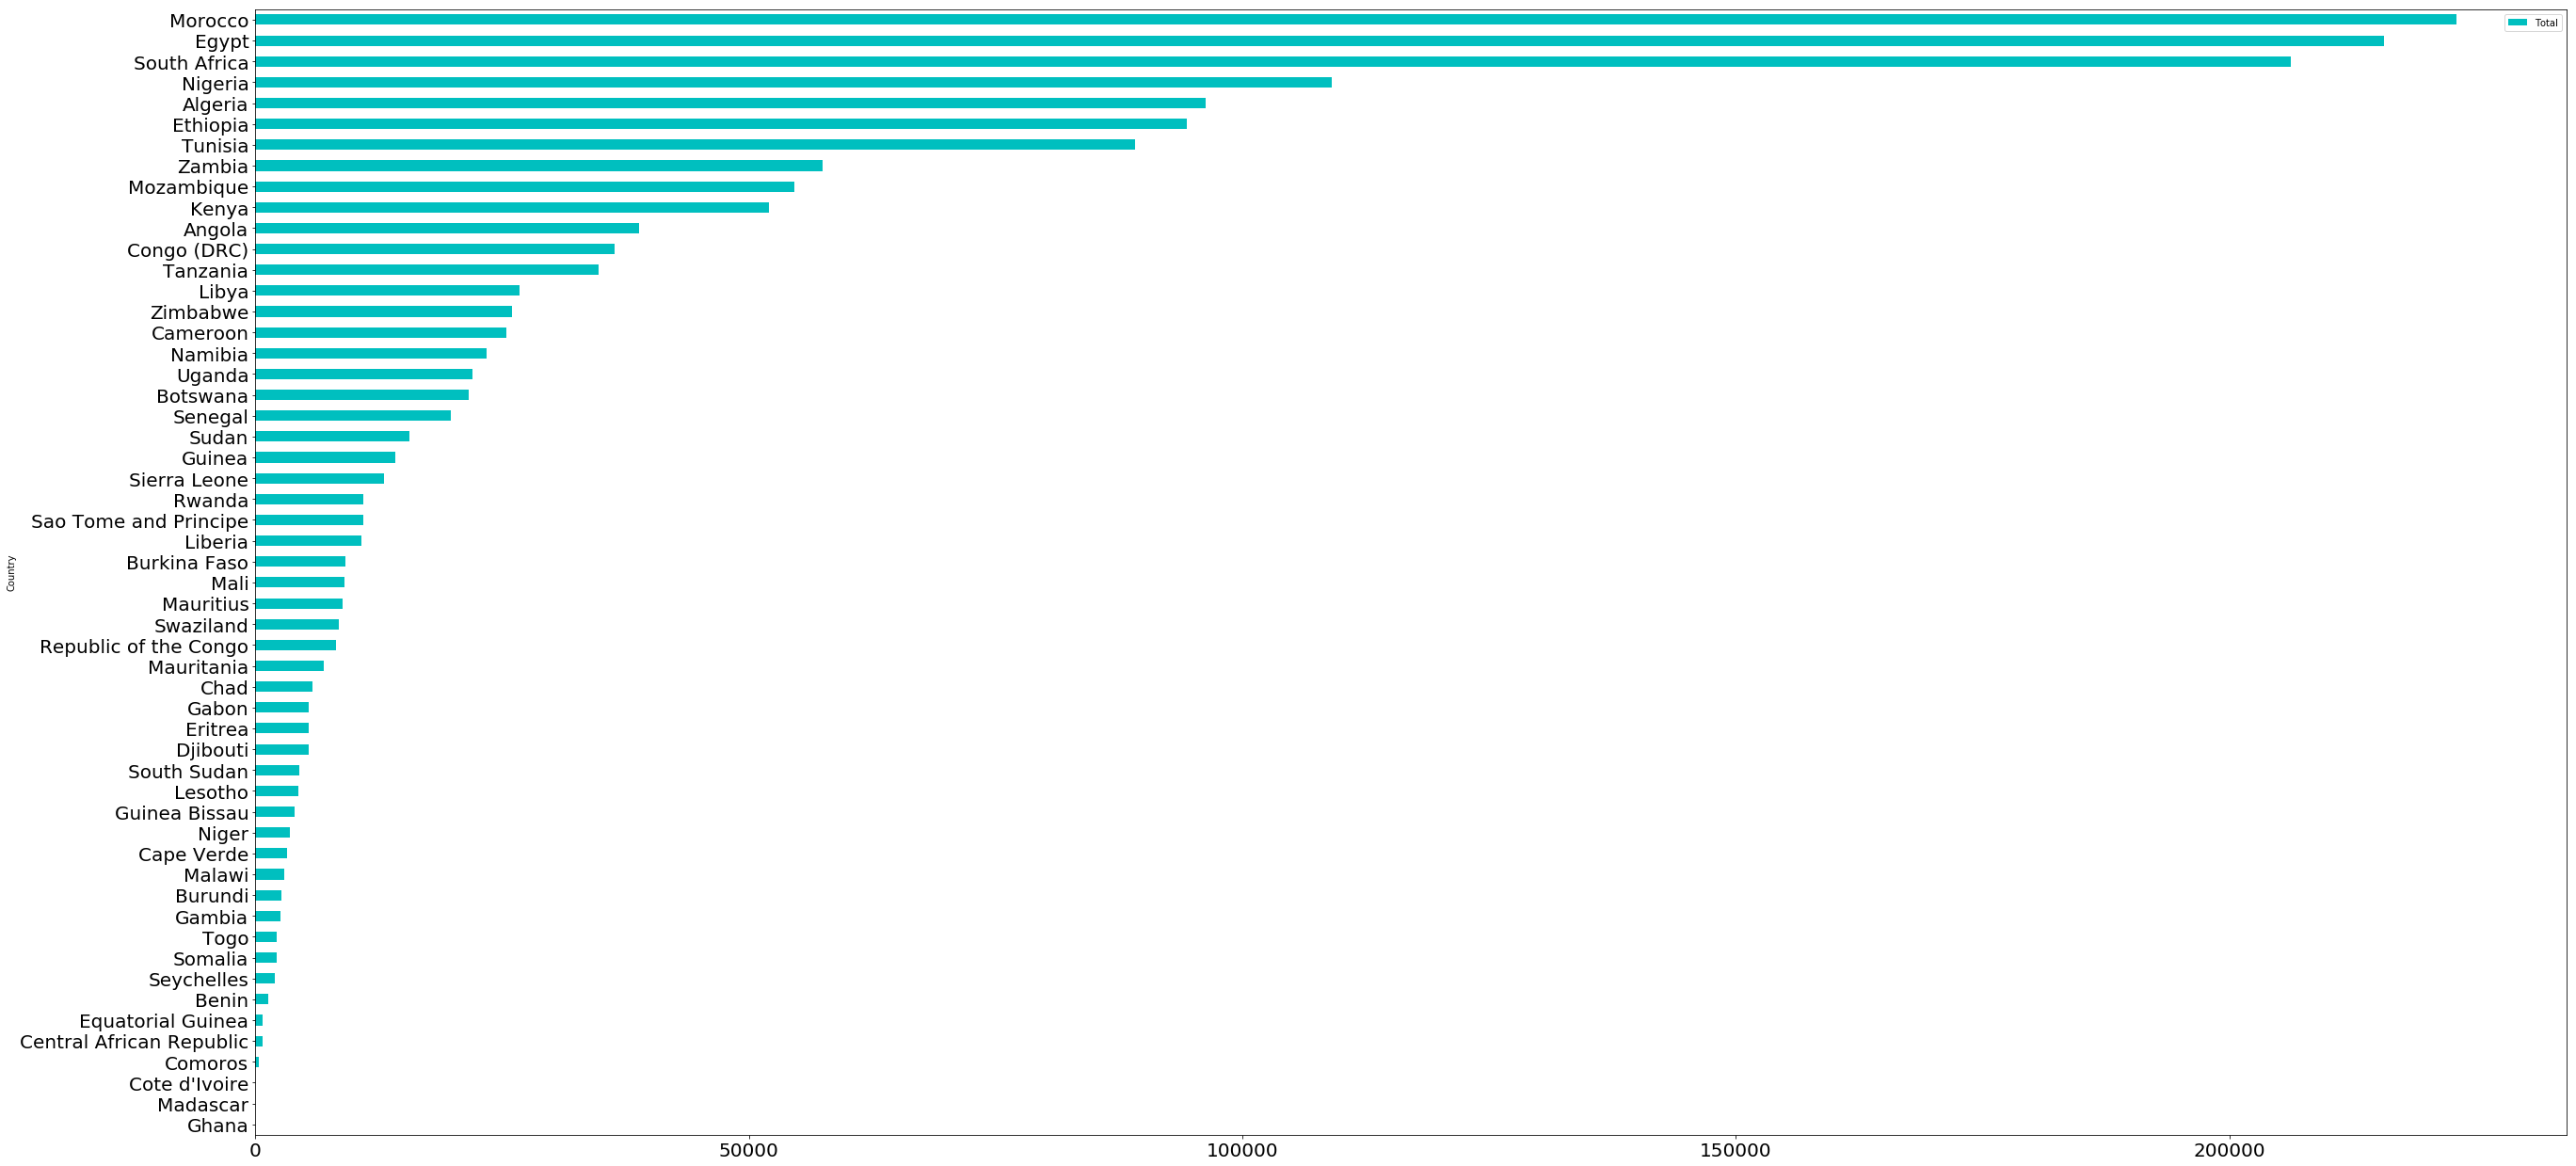

In [52]:
#Create a new DataFrane that will hold the total 10 year investment range for each and every country
dfFinal = pd.DataFrame(newarr , columns =['Total'])
dfFinal["Country"] = df["Country"].unique()

max_investment = dfFinal["Total"].max()
max_country = dfFinal.loc[dfFinal["Total"]== max_investment,"Country"].values[0]
min_investment = dfFinal.loc[dfFinal["Total"] > 1, "Total"].min()
min_country = dfFinal.loc[dfFinal["Total"]==min_investment, "Country"].values[0]


print("The maximum investment in the 10 year range 2003 to 2016 happened in {}: {} Million USD ".format(max_country, max_investment))
print()
print("(The minimum value projected is a non zero value.)")
print("The minimum investment in the 10 year range 2003 to 2016 happened in {}: {} Million USD ".format(min_country, min_investment))
colors = "grcmkw"
choice = random.choice(colors)
dfFinal = dfFinal.sort_values(by=['Total'], ascending =True)
dfFinal.plot.barh(dfFinal["Country"], figsize=(44,22), color = choice, stacked = True, fontsize =20)

In [ ]:
dfKeys = pd.read_csv("Industry_keys.csv")
dfKeys['Variable name'] = dfKeys['Variable name'].astype(str) + 'all'
print("All Industries and there specific codes are:")
print()

print(dfKeys)

#Choice of 3
#Buisness Services, Alt-Energy ,Coal oil and NG, Communicaions, Finance, Hotels and Tourism, Software, Food Tobacco, Metals, RealEstate

In [ ]:
pick = input("Enter the name of the country to know its FDI details: \n")

#if pick.type() == str():
    
for i in Country:

    if (choice == i):    
        print("1 : A normal plot of {}'s total FDI investment in a 10 year range ".format(choice))
        print("2 : A pie chart of {}'s total FDI investment in a 10 year range divided by year".format(choice))
        print("Any other character : Exit")
        print()
        x = int(input("Enter from the choices above: "))
        print()


        #FOR NORMAL PLOT
        if(x==1):

            print("1: Plot a graph with just the total FDI in {}".format(choice))
            print("2: Plot a graph with the industries in {}".format(choice))
            print("Any other character : Exit")
            y= int(input("Enter your choice: "))

            if(y == 1):
                #single_country =np.zeros(total_country)
                total =[]
                for i in range(2003,2017):
                    x = df.loc[(df["Country"] == choice) & (df["Year"] == i), "Total"]
                    total.extend(x)
                    var = sum(total)
                print("The total investment in", choice , "in year range 2003-2016 in is {} million " .format(var))
                newarr.append(var)

                #Plots for countries in the years.
                fig, ax = plt.subplots(figsize=(12,6), facecolor="lightgray")

                colors = "bgrcmykw"
                color2 = random.choice(colors)
                color3 = random.choice(colors)
                plt.plot(df.loc[df["Country"]==choice, "Year"], df.loc[df["Country"]==choice, "Total"], color = "firebrick", label = choice)

                plt.grid(color='black', linestyle='-', linewidth=0.5)
                plt.xlim(left = 2003,right = 2016)
                legend = plt.legend(fontsize = 10)
                plt.xlabel("Years")
                plt.ylabel("FDI in millions")
                plt.show()

            elif(y==2):

                print("Choose from following industries: ")
                print("Choose 0 to get out")
                for i in dfKeys["Sectors"]:
                    print(dfKeys.loc[dfKeys["Sectors"] == i])

                #array to hold all
                feature = []
                i = 0
                while(i < 3):
                    z = str(input("Enter your choices using the codes next to the Industry name: "))
                    feature.append(z)
                    if(z == 0):
                        break
                    i += 1
                print()

                total =[]
                for i in range(2003,2017):
                        x = df.loc[(df["Country"] == choice) & (df["Year"] == i), "Total"]
                        total.extend(x)
                        var = sum(total)
                print("The total investment in", choice , "in year range 2003-2016 in is {} million " .format(var))
                newarr.append(var)
                #Plots for countries in the years.
                fig, ax = plt.subplots(figsize=(12,6), facecolor="lightgray")

                colors = "bgrcmykw"
                

                plt.plot(df.loc[df["Country"]==choice, "Year"], df.loc[df["Country"]==choice, "Total"], color = "firebrick", label = choice)
                for f in feature:
                    color1 = random.choice(colors)
                    plt.plot(df.loc[df["Country"]==choice, "Year"], df.loc[df["Country"]==choice, f], color = color1, label = f)


                plt.grid(color='black', linestyle='-', linewidth=0.5)
                plt.xlim(left = 2003,right = 2016)
                legend = plt.legend(fontsize = 10)
                plt.xlabel("Years")
                plt.ylabel("FDI in millions")
                plt.show()



        #FOR THE PIE CHART
        elif(x==2): 

            colors = "bgrcmykw"
            color1 = random.choice(colors)
            plt.pie(df.loc[df["Country"] == choice, 'Total'] ,labels = df.loc[df["Country"] == choice, "Year"])
            plt.axis('equal')
            plt.show()

        else:
            print("Aborted.")

    else:
        continue

#else:
 #   print("Not a Country!")

In [43]:
print("All numeric values are in millions")
print()

for name in Country:
    #single_country =np.zeros(total_country)
    total =[]
    for i in range(2003,2017):
        x = df.loc[(df["Country"] == name) & (df["Year"] == i), "Total"]
        total.extend(x)
    #The mean of the of the total investments in all countries
    mean = sum(total)/len(total)
    
    print("The mean of investments in country ", name ," is: ", mean," million")

All numeric values are in millions

The mean of investments in country  Algeria  is:  6876.92857143  million
The mean of investments in country  Angola  is:  2777.71428571  million
The mean of investments in country  Benin  is:  95.3571428571  million
The mean of investments in country  Botswana  is:  1541.5  million
The mean of investments in country  Burkina Faso  is:  647.428571429  million
The mean of investments in country  Burundi  is:  187.285714286  million
The mean of investments in country  Cameroon  is:  1815.35714286  million
The mean of investments in country  Cape Verde  is:  231.785714286  million
The mean of investments in country  Central African Republic  is:  48.0714285714  million
The mean of investments in country  Chad  is:  415.5  million
The mean of investments in country  Comoros  is:  23.1428571429  million
The mean of investments in country  Congo (DRC)  is:  2595.92857143  million
The mean of investments in country  Cote d'Ivoire  is:  0.0  million
The mean 